# CSCI 443 Homework 4

In homework 3, we left off with Z-scores and sampling distributions.  

In this homework we focus on confidence intervals and the effects of
skewness on computing confidence intervals.

#### Part 1: Inline LaTeX support in Databricks.

Previously I had dollar signs ($) scattered throughout the 
text where I wanted to represent math.  I found the solution to this for Databricks.

In Jupyter notebooks, we can represnt LaTeX math within a line of text by surrounding 
the text with a single dollar sign on each side.  This doesn't work in Databricks.
However, with a little searching I found a syntax that DOES work to support inline LaTeX.
The same syntax works in both Databricks and Jupyter, and I will be using it going 
forward.

As an example:

>  In the early stages of a pandemic, the number of infections tends to 
>  grow exponentially.  In a fully susceptible population, the average number of 
>  secondary infections created by a single infected individual is called  the Basic
>  Reproduction Number (\\(R_0\\)).

\\(R_0\\) is an example of inline LaTeX, meaning the mathematical expression 
appears within the text.  This was achived by preceding the math with two 
blackslashes and an open parenthesis and succeeding the math with two backslashes
and a close parenthsis. \\(R_0\\) is written as

    \\\(R_0\\\)

Render the mathematical expressions described by the following by inserting
LaTeX into this workbook.

**Problem 1.1** Express PDF of a binomial distribution.  (NOTE: Not the binomial theorem which 
    was a problem in the last homework).

**A:**e

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$


**Problem 1.2** Express the formula for the sample variance, which is calculated as the sum of 
    squared deviations from the mean divided by the number of observations minus one.

A:

$$s_x = \frac{1}{n-1} \sum_{i=1}^{n} (x-\bar{x})^2$$

**Problem 1.3** Write a sentence that includes one over r squared within the text.  The intent
is to specifically exercise using inline LaTeX for this problem.

A: "The strength of the gravitational field diminishes with \\(\frac{1}{r^2}\\)."

Any answer that includes \\(\frac{1}{r^2}\\) satisfies the question.
                                                
                                                                       

## Part 2: Formal definition for Skewness

We mostly covered skewness empirically.  "Follow the tails" being a useful mnemonic.

In most cases, a left (negative) skewed distribution is characterized by having
a mean that is less than the median, i.e., the heavy tail on the left has pulled
the mean to the left of the median.  Conversly, a right skewed distribuion is 
characterized by having a mean that is greater than the median.  We will not
encounter any distributions in this class where this is not true.  However, 
the relationship between the mean and median is merely a consequence, it isn't
the formal definition of skewness.  Skewness (\\(\gamma\\)) is most often defined 
as follows

$$\text{Skewness } \gamma = \frac{E[(X-\mu)^3]}{\sigma^3}$$

The sample variance \\(\sigma^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\)
uses \\(\frac{1}{n-1}\\) instead of \\(\frac{1}{n}\\) to 
account for sample variance being computed from the same samples
as the sample mean.  

Sample Skewness (\\(G_1\\)) has a somewhat more complicated correction
to handle the bias introduced by computing the sample mean, sample
standard deviation, and sample skewness from the same samples.

$$G_1 = \frac{n}{(n-1)(n-2)}\sum_{i=1}^n \bigg(\frac{x_i-\bar{x}}{s}\bigg)^3$$

where

  - \\(n\\) is the number of samples
  - \\(x_i\\) is the \\(i^{th}\\) sample.
  - \\(\bar{x}\\) is the sample mean.

\\(\frac{n}{(n-1)(n-2)}\\) includes the correction for the bias 
introduced by computing \\(\bar{x}\\), \\(s\\), and 
\\(G_1\\) from the same samples.  The derivation of this
correction is outside the scope of the course, but I welcome
the student to study it further should they wish.




**Problem 2.1** Create code in this notebook to compute the sample skewness.

    def sample_skewness(samples) -> float:
      ...

In [9]:
import numpy as np
def sample_skewness(samples) -> float:

    # correction for use of sample statistics.
    xbar = np.mean(samples)
    n = len(samples)
    sx = np.std(samples, ddof=1)
    shifted = samples - xbar
    cubed = shifted * shifted * shifted  # hadamard product twice to achieve cubes.
    sumcubed = np.sum(cubed)
    G_1 = n/((n-1)*(n-2)) * sumcubed / (sx**3)
    return G_1
    

**Problem 2.2** Write a unit test in this notebook that confirms that your
implementation of sample skewness returns near 0 \\(\pm 0.05\\) for a
sufficient number of samples drawn from U[0,1].  U[0,1] is symmetric.
All symmetric distributions exhibit 0 skewness.  


In [10]:
from scipy.stats import skew

np.random.seed(101)
samples = np.random.rand(1000)
gamma = sample_skewness(samples)
assert -0.05 < gamma < 0.05

sgamma = skew(samples)
assert abs(gamma-sgamma) < 0.05

In [11]:
import numpy as np
from scipy.stats import skew
import unittest
class TestSkewness(unittest.TestCase):
    def test_skew(self):
        np.random.seed(101)
        samples = np.random.rand(10000)
        gamma = sample_skewness(samples)
        # asserting -0.05 < gamma < 0.05
        self.assertLess(-0.05, gamma)
        self.assertLess(gamma, 0.05)

import sys
from unittest.mock import patch

with patch.object(sys, 'argv', test=['']):
    unittest.main(exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


**Problem 2.3** Write a second unit test that confirms that your implementation returns \\(2 \pm 0.05\\) for a sufficient number of samples drawn from an exponential random variable with \\(\lambda=1\\).

In [12]:
samples = np.random.exponential(scale=1, size=1000000)
gamma = sample_skewness(samples)
sgamma = skew(samples)
assert abs(gamma-sgamma) < 0.05
assert 2-0.05 < gamma < 2+0.05


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_triangular_distribution(a, b, c):
    """
    Plots a triangular distribution with labels for a, b, and c.
    The peak (c) must be between a and b.
    
    Parameters:
    - a: The minimum value of the distribution
    - b: The maximum value of the distribution
    - c: location of the mode (peak) of the distribution
    """
    assert a <= c <= b 
    
    # Define points for the triangular shape
    x = [a, c, b]
    h = 2 / (b-a)
    w = b-a
    y = [0, h, 0]
    
    # Plotting the triangular distribution
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, '-o', label='Triangular Distribution')
    
    # Annotating points a, b, and c
    plt.text(a - 0.025 * w, 0.05, 'a', ha='center', va='bottom', fontsize=12)
    plt.text(b + 0.025 * w, 0.05, 'b', ha='center', va='bottom', fontsize=12)
    plt.text(c, 1.05 * h, 'c', ha='center', va='bottom', fontsize=12)
    
    # Additional plot settings
    plt.fill_between(x, y, color='skyblue', alpha=0.5)
    plt.xlim([a - 0.1 * (b - a), b + 0.1 * (b - a)])
    plt.ylim([0, h * 1.15])
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title('Example Triangular Distribution')
    plt.grid(True)
    plt.show()




**Problem 2.4** Skewness of a distribution is defined as

<!--
\\[ \xcancel{E[(X - \mu)^3] = \int_{-\infty}^{\infty} (x - \mu)^3 f(x) \, dx} \\]

*Revised*
-->

\\[ \frac{E[(X - \mu)^3]}{\sigma^3} = \int_{-\infty}^{\infty} \frac{(x - \mu)^3}{\sigma^3} f(x) \, dx \\]

A triangular distribution is defined by three parameters.  It has the pdf

\\[
f(x) = \begin{cases} 
  0      & \text{if } x \leq a \\
  \frac{2\cdot(x-a)}{(b-a)(c-a)}& \text{if } a \leq x \leq c \\
  \frac{2\cdot(c-x)}{(b-a)(c-b)}& \text{if } c \leq x \leq b \\
  0 & \text{if } x \geq b \\
\end{cases}
\\]

where 

 * \\(a\\) is the left corner of the triangle, i.e., the lower bound
   of the distribution's pdf.   
 * \\(b\\) is the right corner of the triangle, i.e., the upper bound
   of the distribution's pdf.
 * \\(c\\) is at the peak of the triangle, i.e., the mode of the
   distribution's pdf.

An example triangular distribution is shown below.


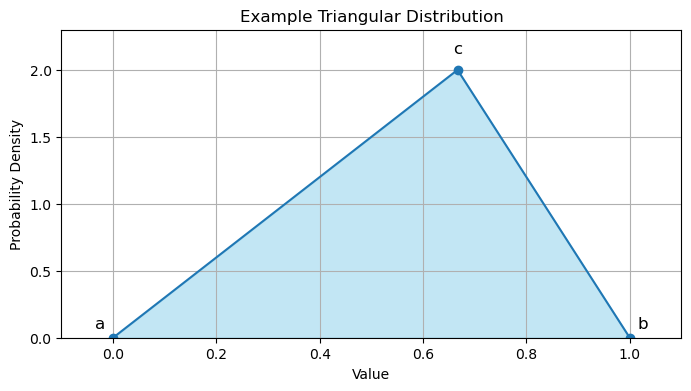

In [14]:
plot_triangular_distribution(a=0, b=1, c=2/3)


The mean of a triangular distribution is given by 

\\[ \mu = \frac{a + b + c}{3}\\]

A right triangular distribution with the peak on the right edge of the 
triangle has \\(b=c\\), as shown below.  The triangle is shifted to the 
left so that the mean resides at 0.


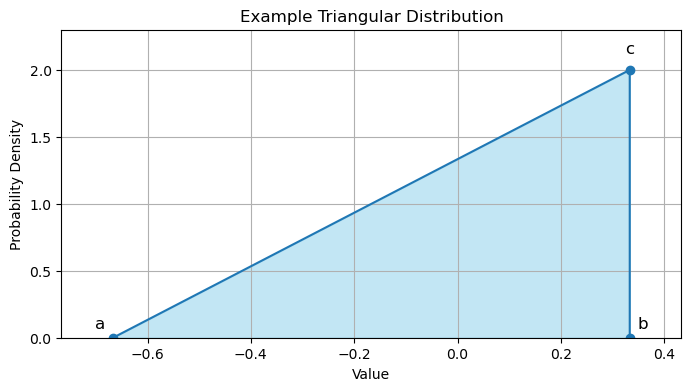

In [15]:
a, b, c = -2/3, 1/3, 1/3 
plot_triangular_distribution(a, b, c)

PDF of a right triangle distribution:

\\[ f(x) = \frac{2(x-a)}{(b-a)^2} \quad \text{for } a \leq x \leq b \\]

However, \\(b-a=1\\), \\(a=-2/3\\), and \\(b=1/3\\) causing the above to simplify

\\[ f(x) = 2(x+\frac{2}{3}) \quad \text{for } -\frac{2}{3} \leq x \leq \frac{1}{3} \\]

Derive the skewness for this distribution.

A: 

\\[ \frac{E[(X - \mu)^3]}{\sigma^3} = \frac{1}{\sigma^3} \int_{-\frac{2}{3}}^{\frac{1}{3}} x^3 \cdot 2(x+\frac{2}{3}) \, dx \\]

$$\frac{1}{\sigma^3} \bigg(\frac{2}{5}x^5 + \frac{1}{3}x^4 \bigg)\bigg|_{x=-\frac{2}{3}}^{\frac{1}{3}}$$

$$\frac{1}{\sigma^3} \bigg(\frac{2}{5}(\frac{1}{3})^5 + \frac{1}{3}(\frac{1}{3})^4 - \frac{2}{5}(-\frac{2}{3})^5 - \frac{1}{3}(-\frac{2}{3})^4 \bigg)$$

$$\gamma = \frac{-0.0\overline{074}}{\sigma^3}$$

The standard deviation of a triangular distribution is given by

\\[ \sigma = \sqrt{\frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}}\\]

Because \\(b==c\\) the standard deviation simplifies to

<!-- \\[ \sigma = \sqrt{\frac{a^2 + b^2 + \cancel{b^2} - ab - ab - \cancel{b^2}}{18}}\\]
-->
\\[ \sigma = \sqrt{\frac{a^2 + b^2 + b^2 - ab - ab - b^2}{18}}\\]

\\[ \sigma = \frac{\sqrt{a^2 - 2ab + b^2}}{3\sqrt{2}} = \frac{|a-b|}{3\sqrt{2}} = \frac{1}{3\sqrt{2}} \\]

\\[ \sigma \approx 0.2357 \\]

\\[ \gamma = (3\sqrt{2})^3 \cdot -0.0\overline{074} \\]

\\[ \boxed{\gamma \approx -0.566} \\]


## Part 3: Some intuition behind skewness

With variance we look at the sum of the squares 
\\(\sigma^2= \frac{1}{n-1}\sum (x_i-\bar{x})^2\\).
The square means that all terms in the summation are positive.  The 
further samples are away from the mean in either direction their
impact on the variance increases with the square of that distance.
Skewness uses the sum of the cubes.  Consider the case when
\\(\bar{x}\\) is 0 and let \\(C\\) denote \\(n/((n-1)(n-2))\\). The
computation of sample skewness simplifes to a sum of cubics: 

$$C\cdot \sum_{i=0}^{n} x^3$$

\\(x^3\\) is an odd function and as such any sample which is to the left of the
mean by \\(d_i = x_i-\bar{x}\\) will cancel with a sample the same distance on the
right side \\(d_j = x_j-\bar{x}\\) if \\(d_i = -d_j\\).  A symetric distribution 
thus has 0 skewness regardles of its variance.


**Problem 3.1** Write code in this notebook to draw 100 samples from a uniform random
variable \\(U[0,1]\\). Use matplotlib to create a relative
frequency histogram samples with 5 bins to confirm that the shape is 
roughly uniform.  Not all buckets will obtain the same number of samples.   
Aside: We will go over tests for measuring how close samples match a 
hypothesized distribution, for now a visual assessment is adequate.


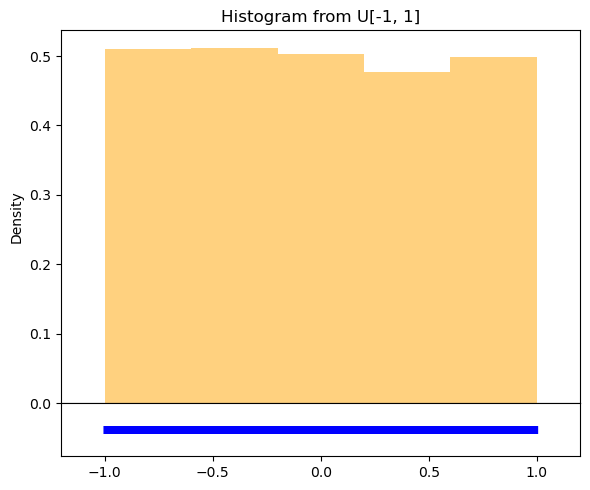

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

# Generating two separate plots: one for the histogram and one for
# the samples along the real line
np.random.seed(23)

n = 10000   # number of samples

# Generate n samples obeying U[-1, 1]
samples = np.random.uniform(-1, 1, n)

# creating two subplots where the second (samples on a real-line) has less height.
fig = plt.figure(figsize=(6, 5))

# This creates a grid of 2 rows with a 7:1 height ratio
gs = gridspec.GridSpec(2, 1, height_ratios=[7, 1], hspace=0)

# add_subplot returns an Axes object.  Each Axes object
# is essentially a subplot.  It has axes, a title, data, etc.
axs = []
axs.append(fig.add_subplot(gs[0]))
axs.append(fig.add_subplot(gs[1]))

# Plot the histogram of the samples
axs[0].hist(samples, bins=5, density=True, alpha=0.5, color='orange')
axs[0].set_title('Histogram from U[-1, 1]')
axs[0].set_xticks([]) # Hiding the x-axis
axs[0].set_ylabel('Density')

# Plotting the samples along the real line
axs[1].scatter(samples, np.zeros_like(samples), alpha=0.5, 
               marker='|', color='blue')
axs[1].set_yticks([]) # Hiding the y-axis

# Setting the same x limits for both plots for easy comparison
for ax in axs:
    ax.set_xlim([-1.2, 1.2])

plt.tight_layout()
plt.show()


**Problem 3.2** Create a plot that shows the sum of the squares 
\\(\sum_{i=1}^n (x_i-\bar{x})^2 \\) for the same samples as generated in Problem \\(\xcancel{2.5}\\) 3.1.
The x-axis should be \\(i\\) where \\(i\\) denotes the \\(i^{th}\\) sample.
The y-axis should be the sum of the squares up to the \\(i^{th}\\) sample.
This plot should be non-decreasing.  It demonstrates how sum of squares increases
whether samples fall above or below the mean.  

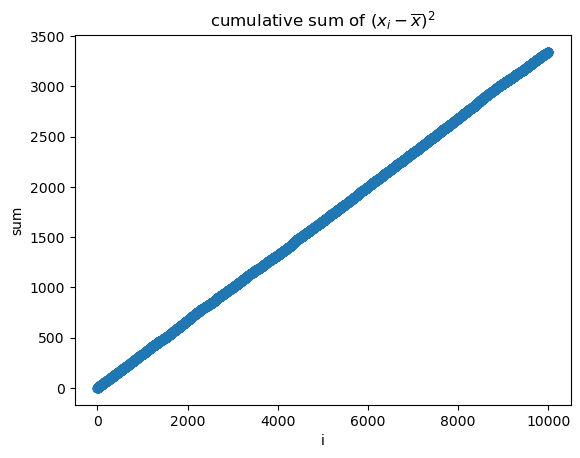

In [17]:
# Using samples from above.
diffs = samples - np.mean(samples)
sqx = np.multiply(diffs, diffs)  # performs elementwide multiplicatoin (Hadamard product) between diffs with itself.
sumsqx = np.cumsum(sqx)
plt.scatter(range(len(samples)), sumsqx)
plt.title("cumulative sum of $(x_i-\\overline{x})^2$")
plt.xlabel("i")
plt.ylabel("sum")
plt.show()

**Problem 3.3**  Order the samples from Problem \\(\xcancel{2.5}\\) 3.1 from smallest to largest and create another plot.  


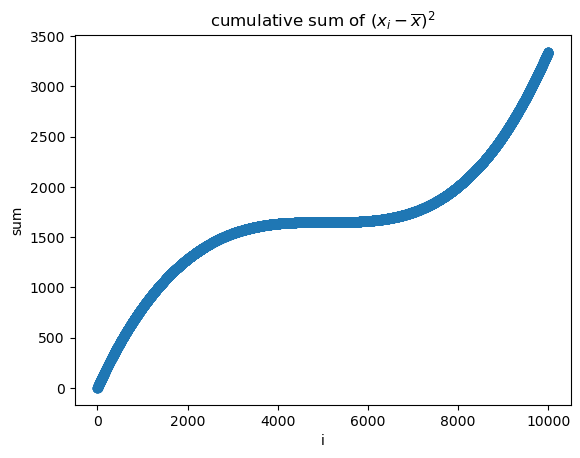

In [18]:
# Using samples from 3.1 above.
sorted_samples = sorted(samples)
diffs = sorted_samples - np.mean(sorted_samples)
sqx = np.multiply(diffs, diffs)  # performs elementwide multiplicatoin (Hadamard product) between diffs with itself.
sumsqx = np.cumsum(sqx)
plt.scatter(range(len(samples)), sumsqx)
plt.title("cumulative sum of $(x_i-\\overline{x})^2$")
plt.xlabel("i")
plt.ylabel("sum")
plt.show()

**Problem 3.4** When the samples are ordered, what happens? Explain the shape. What does the shape of the curve tell us about the contribution to the variance of points that are farther from the mean?

A: The shape is an increasing function that grows steeper for the extrema.  Given that
the underlying distribution is uniform we would expect the median to be very near the
mean, as such the middle of the plot should be at or near \\(\bar{x}\\) and all those
to the left are progressively farther from the mean as we go left.  Conversely, all
those to the right of middle of the the plot should be above the mean and progressively
as we go to the right.  This demonstrates that those farther from the mean contribute
more strongly to the variance.  This is consistent with summing the squares of the 
distance from the mean.

**Problem 3.5** Create another plot that shows the sum of the 
cubes \\(\sum_{i=1}^n (x_i - \bar{x})^3\\) for the same samples 
generated in Problem \\( \xcancel{2.2}\\) 3.1.  The resulting plot should NOT be
increasing.

mean of the samples=-0.009309010588875894


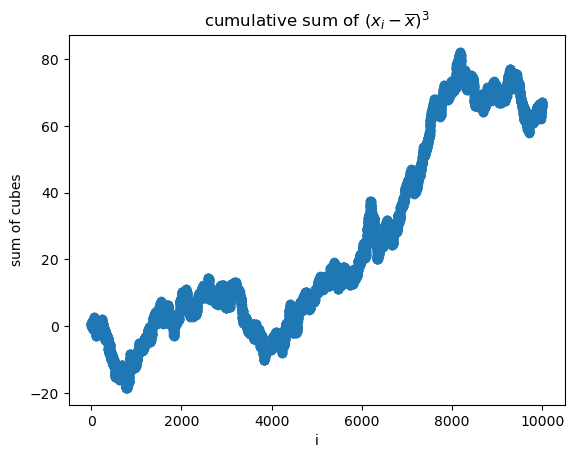

In [19]:
# Using samples from above.
print(f"mean of the samples={np.mean(samples)}")
xbar = np.mean(samples)
#xbar = 0
diffs = samples - xbar
cubx = np.multiply(np.multiply(diffs, diffs), diffs) 
sumcubx = np.cumsum(cubx)
plt.scatter(range(len(samples)), sumcubx)
plt.title("cumulative sum of $(x_i-\overline{x})^3$")
plt.xlabel("i")
plt.ylabel("sum of cubes")

plt.show()

The plot above is trending upward but it is not increasing.  It looks like a random
walk.  Compared to the range that is seen for the y-axis in the plot sum square
of the distances of \\(x\\) from the mean, the range for this plot is 
small.  This makes sense given that the \\((x_i - \bar{x})^3\\) is odd.  As a result,
the values to the right of the mean should largely cancel the values to the left of hte
mean.  For symmetric distributions, the sum of the cubes should stay near 0.

**Problem 3.6** Order the samples from smallest to largest and create the same plot again
but with the ordered samples.  


np.mean after subtracting the mean is -4.5474735088646414e-17


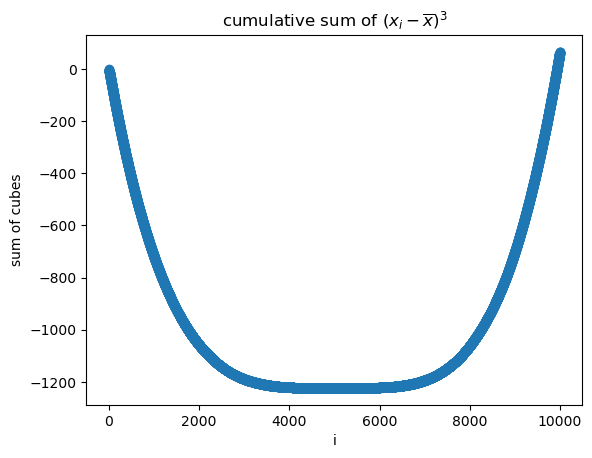

In [20]:
#S = np.array([1, 2, 3])
#cubs = np.multiply(np.multiply(S, S), S)
#print(f"S={S}, cubs = {cubs}")

sorted_samples = np.sort(samples)
diffs = sorted_samples - np.mean(sorted_samples)
print(f"np.mean after subtracting the mean is {np.mean(diffs)}")
cubx = np.multiply(np.multiply(diffs, diffs), diffs) 
sumcubx = np.cumsum(cubx)
plt.scatter(range(len(samples)), sumcubx)
plt.title("cumulative sum of $(x_i-\overline{x})^3$")
plt.xlabel("i")
plt.ylabel("sum of cubes")

plt.show()

(c) How does this plot differ from the plot for cumulative sum of squares?
Note that the function is no longer non-decreasing.  How does the shape of the 
curve affect the contribution of the samples 
to the left of the mean vs. to the right of the mean for 
an unskewed distribution? 

* A: Those to the left of the mean drove the sum of cubes negative.
  Those to the right of the mean push the sum back toward zero.
  For an unskewed distribution, I would expect those to the left of the 
  mean to roughly cancel those to the right of the mean ending up with
  a near-zero skewness.

(d) How does the shape of this curve affect the contribution of samples 
farther from the mean than nearer to the mean? What happens if more samples
are near the mean on one-side of the distribution as would occur with 
a skewed distribution?

* A: Since the difference of each sample from the mean is cubed, bigger differences have far greater impact.  Because \\(y=x^3\\) is an odd function, negative differences become substantially more negative, and conversely, positive differences become substantially more positive.  If the distribution is skewed then one side likely has a heavier tail.  The points in the tail have substantially more affect on the skewness than those near the mean and as such skewness is positive when a distribution is heavier right tail and skewness is negative when a distribution has a heavier left tail.


## Part 4: Binomial Distributions and Confidence Intervals.

A *Bernoulli random variable* is defined by a single trial that can
result in one of two possible outcomes: 0 and 1, heads or tails, pass or file.  
One outcome occurs with probability \\(p\\), and the other outcome 
occurs with probability \\(1−p\\). 

A *binomial random variable* represents the sum of outcomes from a series 
of Bernoulli trials. Unlike continuous random variables, which can 
assume any value within a given range, a binomial random variable
can only take on integer values, because the binomial random variable
counts the number of successes in \\(n\\) trials, making it a discrete
random variable.

With continuous random variables, the probability that an outcome 
within a range occurs \\([a,b]\\) is given by the area under the probability
density function curve for that range.  We thus compute the probability
of an outcome landing in \\([a,b]\\) as the integral of the PDF from 
\\(a\\) to \\(b\\).  For a continuous random variable, the probability
of a specific outcome is zero: there is zero probability that the
exact same outcome occurs twice.  For continuous random variables
we only talk about the probability that an outcome occurs within a range.
Since we use the term "probability density," the integral over a range
is sometimes referred to as a "probability mass."

With a discrete random variable, the Probability Mass Function (PMF) assigns 
a discrete probability mass to each outcome.   The PMF for a binomial
random variable defines the probability of observing exactly
\\(k\\) successes in \\(n\\) Bernoulli trials, where each trial has a 
success probability of \\(p\\).  The binomial PMF is

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

The *sample proportion* is the percentage of the sample that has an
outcome.  For a binomial random variable, which sums the outcomes of 
\\(n\\) independent Bernoulli trials, the sample proportion is used
to estimate the probability of success (\\(p\\)) of the underlying 
Bernoulli random variable.

**Problem 4.1** Use matplotlib to create a single plot containing 
the PMF of a Binomial random variable for \\(p=0.5\\).  A trial of a 
binomial random variable involves perfoming \\(n\\) Bernoulli trials.
Perform 1000 or 10000 (see note 1) binomial trials each of \\(n=100\\) Bernoulli trials
with \\(p=0.5\\).  Perform each Bernoulli trial using a random
number generator.  Plot relative frequency histogram of the
Bernoulli trials on the same plot as the PMF of a binomial random 
variable.

Note 1: I suggested increaing the number of binomial samples (i.e., 
trials) from 1000 to 10000 to better show the skew.  Either should
1000 or 10000 should be accepted.

Note 2: Depending on how many bins are used, there may be steeper spikes followed by 
shallow troughs.  This is called *binning bias*.  The effect can be pronounced when 
data has a periodic component that is out of phase with the histogram's binning
intervals. This misalignment can cause certain values to be overrepresented (peaks)
or underrepresented (troughs) based solely on the arbitrary choice of bin size or 
start point.  


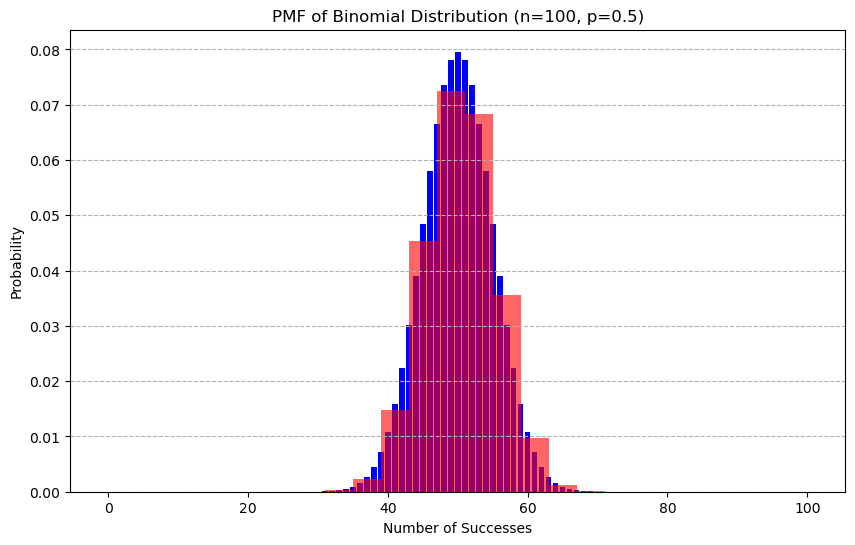

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

def plot_pmf_binomial(n, p, ntrials, bins=10):
    """
    Plot the PMF of a binomial random variable.

    Parameters:
    - n: Number of trials
    - p: Probability of success in each trial
    """
    # Define the range of x values
    x = np.arange(0, n+1)
    
    # Calculate the PMF values for each x
    pmf_values = binom.pmf(x, n, p)

    # Generate n Bernoulli trials.
    bin_trials = []
    for i in range(ntrials):
        sumx = 0
        for j in range(n):
            if np.random.rand() < p:
                sumx += 1
        bin_trials.append(sumx)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(x, pmf_values, color='blue')
    plt.title('PMF of Binomial Distribution (n={}, p={})'.format(n, p))
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.grid(axis='y', linestyle='--')

    plt.hist(bin_trials, bins=bins, density=True, alpha=0.6, color='r')

    plt.show()
    return bin_trials

# Call the function to plot
np.random.seed(17)
n=100
p=0.5
trials = 10000

bin_trials_p50 = plot_pmf_binomial(n,p, trials)

**Problem 4.2** Repeat Problem 4.1 for \\(p=0.2\\).

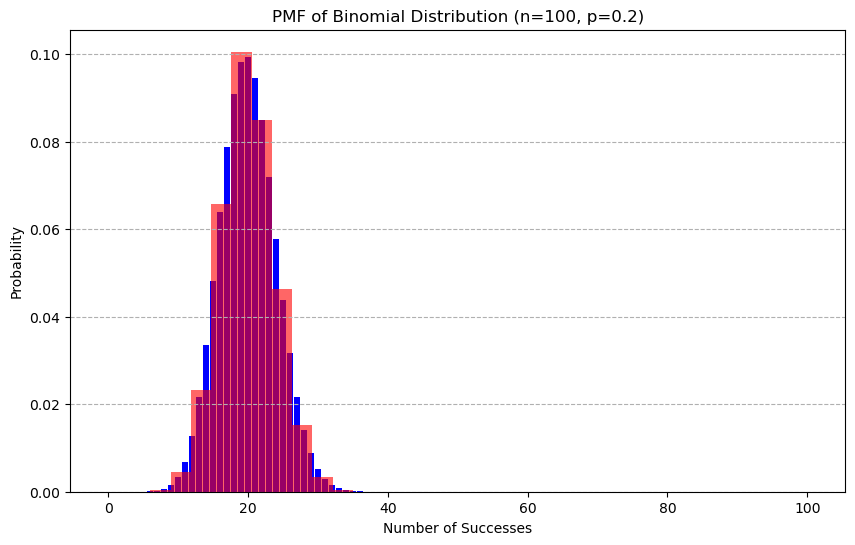

In [41]:
p=0.2
bin_trials_p20 = plot_pmf_binomial(n,p, trials)

### Example with significant binning bias.

Below is the same answer given for 4.2 except we use more bins.  The number of bins is so large that it bin width is on the same order as the number of discrete values that the sample proportion can take.  A sample proportion is a ratio \\(\frac{k}{n}\\).  Since both \\(k\\) and \\(n\\) are integers, the sample proportion can only take on certain discrete values.  If a bucket falls in 
between two such discrete values, a bucket can be empty.  If some buckets
contain two allowed discrete values while others contain only 1, we can
see the distinctive jumps up and down bewteen buckets in the histogram
when a histogram exhibits *binning bias*.

We did not deduct for binning bias.

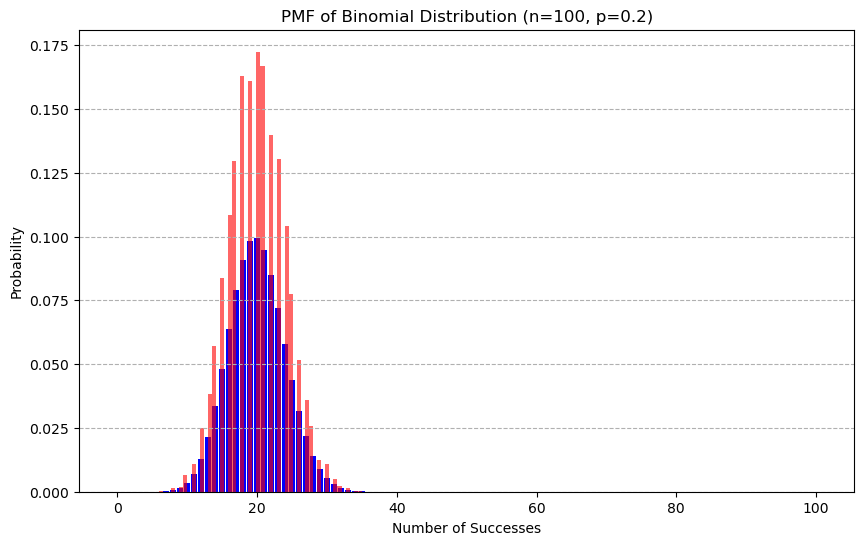

In [42]:
p=0.2
bin_trials_p20 = plot_pmf_binomial(n,p, trials, bins=50)

**Problem 4.3** Repeat Problem 4.1 for \\(p=0.8\\).

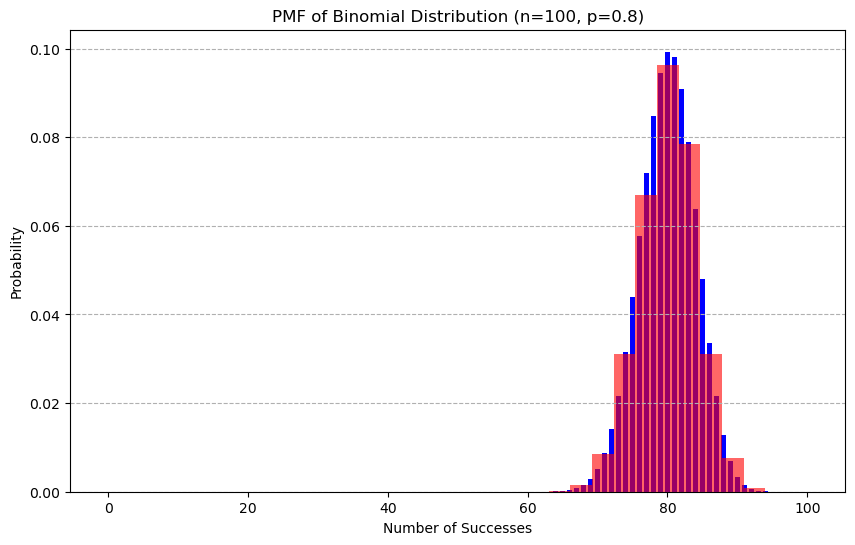

In [23]:
p=0.8
bin_trials_p80 = plot_pmf_binomial(n,p, trials)

**Problem 4.4** Using your function implemented for Problem 2,
compute the sample skewness of the samples
in Problem 4.1.

In [24]:
sample_skewness(bin_trials_p50)

-0.002896251595792975

**Problem 4.5** In the same way, compute the sample skewness of the samples 
in Problem 4.2.

In [25]:
sample_skewness(bin_trials_p20)

0.1269453338446181

**Problem 4.6** In the same way, compute the sample skewness of the samples
in Problem 4.3.

In [26]:
sample_skewness(bin_trials_p80)

-0.14278915474962545

**Problem 4.7** (Original wording) ~~For a binomial distribution with 
\\(n=5\\) and \\(p=0.2\\), simulate drawing 1000 sample sets each of size 5. 
Plot the sampling distribution of the sample proportion (i.e., the percentage of
outcomes with successes).  On the same plot place the PDF of a Gaussian random 
variable~~ \\(N(p, \sigma/\sqrt{n})\\).   ~~What does the Gaussian PDF represent?
Is the sampling distribution skewed or symmetric?  How does it compare to the
original distribution?~~

(Revised wording) *For a binomial distribution with 
\\(n=5\\) and \\(p=0.2\\), simulate drawing 1000 samples of \\(X \sim Bin(n,p)\\) and 
computing the sample proportion .   The distribution of the sample proportion is the
sampling distribution of $p$. Plot this sampling distribution.  On the same plot place
the PDF of a Gaussian random variable \\(N(p, \sqrt{p(1-p)/n}~)\\).  How does the Gaussian PDF relate
to computing confidence intervals?  Is the sampling distribution skewed or
symmetric?  How does the Gaussian distribution compare to the distribution of the 
sample proportion?*

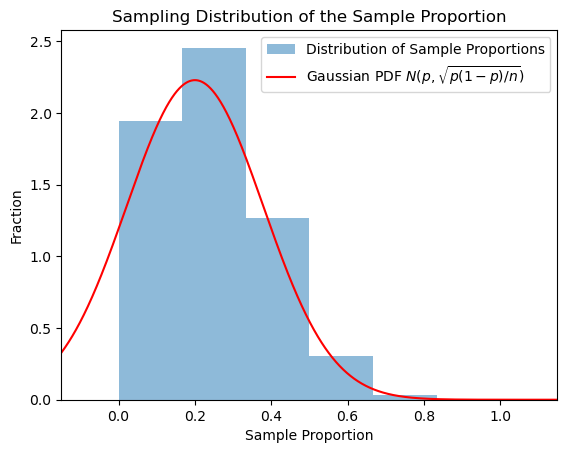

skewness of sample proportions=0.6468417392095542


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(13)

# Parameters for the binomial distribution
n = 5
p = 0.2
m = 10000

def plot_pmf_binomial_sample_proportion(n, p, m):
    """The p value for a binomial random variable can be any value 
    in [0,1], but the sampling proportion $\hat{p}$ is the ratio
    of two discrete values X and n, and as such the sampling
    distribution of $\hat{p}$ is also discrete.  Since $\hat{p}$
    is discrete, it makes sense to talk about its PMF rather
    than its PDF.
    """

    # Simulate drawing 1000 samples from a binomial random variable Bin(n,p)
    samples = np.random.binomial(n, p, m)
    
    # Calculate sample proportions (fraction of successes) for each set
    sample_proportions = samples / n
    
    # Plot the distribution of the sample proportion.  This is 
    # equivalent to plotting the sampling distribution of p.
    if n < 10: 
        bins = n+1
    else:
        bins = n//2 + 1
        
    plt.hist(sample_proportions, bins=bins, density=True, alpha=0.5, label='Distribution of Sample Proportions')
    
    # Parameters for the Gaussian distribution
    mu = p
    sigma = np.sqrt(p * (1 - p) / n)
    
    # Create a range of x values for the Gaussian PDF
    x = np.linspace(-0.15, 1.15, 1500)
    
    # Plot the PDF of the Gaussian distribution
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Gaussian PDF $N(p, \sqrt{p(1-p)/n})$')

    plt.xlim(-0.15, 1.15) 
    
    # Adding labels and title
    plt.title('Sampling Distribution of the Sample Proportion')
    plt.xlabel('Sample Proportion')
    plt.ylabel('Fraction')
    plt.legend()
    
    plt.show()
    return sample_proportions

sample_proportions = plot_pmf_binomial_sample_proportion(n, p, m)
print(f"skewness of sample proportions={sample_skewness(sample_proportions)}")

(original) ~~What does the Gaussian PDF represent?~~(Reworded) How does the Gaussian PDF
relate to computing confidence intervals?

A: The Gaussian PDF has same mean and standard deviation as the distribution of the sample proportion.  
For larger *n* we would expect the Gaussian approximation to be more accurate.  It is this Gaussian
distribution that would be used to compute a confidence interval for the sample proportion if we are 
computing confidence intervals based on Z-scores.  Such intervals are sometimes called "Z-intervals"
to disamiguate them from confidence intervals computed using Student's t-distribution.

Is the sampling distribution skewed or symmetric?   

A: It is skewed and decidedly not symmetric.  The distribution cannot have a significant 
tail to the left since the distribution is bounded by zero on the left.

(Original) ~~How does it compare to the original distribution?~~ (Reworded) How 
does the Gaussian distribution compare to the distribution of the sample proportion?

A: The sampling distribution resembles a Gaussian clipped so that it cannot go 
below zero.  The Gaussian distribution is symmetric, while the sampling 
distribution has right skew.  Other answers are possibly but I would expect
some comment about the overall similarity when away from the x-axis or
that the sampling distribution is clipped or that one is symmetric
while the sampling distribution is not.



**Problem 4.8** For a binomial distribution with \\(n=40\\) and \\(p=0.2\\),
simulate drawing 1000 sample sets each of size 40.  Plot the sample distribution 
of the sample proportion.  How does increasing \\(n\\) affect the skewness of the
sampling distribution?

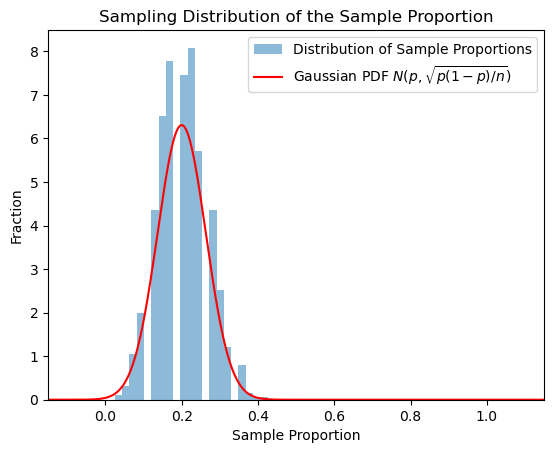

skewness of sample proportions=0.1492134120265669


In [28]:
n = 40
p = 0.2
m = 1000
 
sample_proportions = plot_pmf_binomial_sample_proportion(n, p, m)
print(f"skewness of sample proportions={sample_skewness(sample_proportions)}")


How does increasing n affect the skewness of the sampling distribution?

**A:** The greater number of samples causes the distribution to better
approximate a Gaussian, also because the standard error reduces, the
tails are less affected by the bound in the underlying distribution at 0.


**Problem 4.9** A \\(p%\\) confidence interval for a statistic represents a range
within which we expect to find the true value of a population parameter that
the statistic estimates. More formally, if we were to repeat the
sampling process many times, each time calculating a new confidence
interval using the same procedure, we would expect approximately 
\\(p%\\) of these intervals to contain the true value of the population parameter. 

For a binomial distribution with \\(n=5\\) and \\(p=0.2\\) construct 
1000 50% confidence intervals making the Gaussian assumption about the sampling 
distribution of the sample proportion.  Output the first 10 such 
confidence intervals.   Over the entire 1000 intervals, what fraction of the confidence
intervals contained \\(p\\)?

Aside: More typical confidence levels would be 95% or 99%.  I use 50% to demonstrate
a larger fraction of the true values of \\(p\\) lying outside the confidence interval.

In [44]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def vassert(condition):
    if not condition:
        raise ValueError()

def sample_proportion_ci(x: int | np.ndarray, n: int, 
        confidence_level:float)->(float | np.ndarray, float | np.ndarray):
    """
       Given a single sample of a Binomial random variable with Bin(n,p) where
       p is unkonwn, returns the estimated sample proportion and the margin of
       error (moe). A confidence interval is $\hat{p} \pm moe$.
    
        Args:
            x (int|np.ndarray): number of successes.
            n (int): number of Bernoulli trials, i.e., Bin(n,p) where p
                     is unknown.

        Returns:
            float|np.ndarray, float|np.ndarray: (sample proportion, margin of error)

       To compute the c% confidence interval where c% is the 
       confidence level:
       
         1. compute sample mean of the statistic.  This is just phat = x / n
            since x is already a sum of Bernoulli random variables.
         
         2. compute the standard error.  This is computed from the known
            characteristics of the Bin(n,p).  

              $SE=\sqrt{\frac{p(1-p)}{n}}$
            
         3. Compute the margin of error such that it omits 
            enough of the tails of the sampling distributionthat to area under the PDF
            excluding the tails = c%.
            
            Assuming there are sufficiently many samples for the sampling 
            distribution to look Gaussian, we exclude the area of tails
            using the following:
            
              The sum of the area in the upper and lower tails should
              be such 1- upper tail - lower tail = p.  Given that 
              Gaussian PDF is symmetric, we can subtract 2*tail from 1
              where the upper and lower tail each have area "tail".
              Thus 1 - 2 * tail = c.  The fraction of the area in the tail 
              that should be omitted is thus tail = \frac{1-c}{2}.  The 
              critical Z value at the bottom of the upper tail occurs at 
              $Z^* = ppf(1-\frac{1-c}{2})$.  The margin of error is  Z^* \cdot SE.
            
        4. The confidence interval spans $\mu \pm Z^* \cdot SE$.
    """
    vassert(n > 0)
    vassert(0 < confidence_level < 1)
     
    # Step 1: compute sample mean.
    p_hat = x/n

    # Step 2. compute the standard error.
    # stderr = standard deviation of the sampling distribution.
    # $SE=\sqrt{\frac{p(1-p)}{n}}$
    SE = (p_hat * (1-p_hat) / n) ** 0.5

    # 3. Compute the margin of error   
    Zcrit = norm.ppf(1-(1-confidence_level)/2)

    return p_hat, Zcrit * SE

np.random.seed(101)

n, p, m = 5, 0.2, 1000
x = np.random.binomial(n, p, m)
confidence_intervals = sample_proportion_ci(x, n, 0.5)
p_hats, moes = confidence_intervals

print(f"\n1st ten confidence intervals")
for p_hat, moe in zip(p_hats[:10], moes[:10]):
    print(f"{p_hat} ± {moe}")

contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")


1st ten confidence intervals
0.2 ± 0.12065639452522328
0.2 ± 0.12065639452522328
0.0 ± 0.0
0.0 ± 0.0
0.2 ± 0.12065639452522328
0.4 ± 0.1477733003953674
0.0 ± 0.0
0.4 ± 0.1477733003953674
0.2 ± 0.12065639452522328
0.0 ± 0.0
percent of confidence intervals that contain p: 43.2%


**Problem 4.10** Repeat 4.9 but use Student's t distribution rather than the 
Gaussian distribution to compute the confidence interval of the 
sampling distribution of the sample proportion.  Output the first 10 such 
confidence intervals.  What percentage
of the 1000 confidence intervals contained \\(p\\)?

In [30]:
from scipy.stats import t

def t_sample_proportion_ci(x: int | np.ndarray, n: int, 
        confidence_level:float)->(float | np.ndarray, float | np.ndarray):

    p_hat = x / n
    df = n-1
    SE = (p_hat * (1-p_hat) / n) ** 0.5
    
    # For a c% confidence interval based on the t-distribution,
    # we put half ot the 1-c in the upper tail and half in the lower tail.
    t_critical_upper = t.ppf(1-(1-confidence_level)/2, df) # upper tail.
    return p_hat, SE * t_critical_upper

confidence_intervals = t_sample_proportion_ci(x, n, 0.5)
p_hats = confidence_intervals[0][:10]
moes = confidence_intervals[1][:10]

print(f"\n1st ten confidence intervals")
for p_hat, moe in zip(p_hats, moes):
    print(f"{p_hat} ± {moe}")

p_hats, moes = confidence_intervals
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")



1st ten confidence intervals
0.2 ± 0.1324999224611086
0.2 ± 0.1324999224611086
0.0 ± 0.0
0.0 ± 0.0
0.2 ± 0.1324999224611086
0.4 ± 0.16227860049402593
0.0 ± 0.0
0.4 ± 0.16227860049402593
0.2 ± 0.1324999224611086
0.0 ± 0.0
percent of confidence intervals that contain p: 43.2%


The use of the t-distribution is a bit weird for a binomial.  It does make the 
confidence intervals a bit broader but not enough to change the percentage of
the sample proportions that fall within the confidence intervals.  t-distribution 
is derived from the case when the underlying distribution is Gaussian and n is small.  
Here n is small but when p=0.2, we have a particularly skewed distribution, and the
discrete nature of the binomial random variable does not make the confidence
intervals sufficient enough to reach the neighboring discrete percentage
value that the sample proportion can take.

**Problem 4.11** Repeat 4.9 but with \\(n=40\\) and \\(p=0.2\\) construct
1000 50% confidence intervals making the Gaussian assumption about the sample 
distribution of the sample proportion.  Output the first 10 such 
confidence intervals.  What percentage of the 1000 confidence
intervals include \\(p\\)? 

In [31]:
np.random.seed(101)
n, p, m = 40, 0.2, 1000
x = np.random.binomial(n, p, m)
confidence_intervals = sample_proportion_ci(x, n, 0.5)
p_hats = confidence_intervals[0][:10]
moes = confidence_intervals[1][:10]

print(f"\n1st ten confidence intervals")
for p_hat, moe in zip(p_hats, moes):
    print(f"{p_hat} ± {moe}")

p_hats, moes = confidence_intervals

contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")


1st ten confidence intervals
0.2 ± 0.04265847738115241
0.2 ± 0.04265847738115241
0.1 ± 0.031993858035864305
0.15 ± 0.038080307886014235
0.225 ± 0.044533565650382044
0.25 ± 0.046179156373552306
0.175 ± 0.040522045261773346
0.275 ± 0.047619048016383315
0.225 ± 0.044533565650382044
0.15 ± 0.038080307886014235
percent of confidence intervals that contain p: 46.800000000000004%


**Problem 4.12** What is the \\(n=30\\) rule of thumb for confidence
intervals?  Does it seem to apply for 4.10?  Is 40 enough for 
approximately 50% of the confidence intervals to include \\(p\\)?

The n=30 rules is the number of samples typically needed for the 
sampling distribution of the mean to look Gaussian-enough to 
approximate the sampling distribution with a Gaussian and use
Z-intervals, i.e., 
\\(CI = \bar{x} \pm Z^* \cdot SE\\).

However, sufficient \\(n\\) is dependent on the shape of the underlying
distribution.  A distribution that is skewed may require larger \\(n\\).
A separate rule of thumb is often used for binomial random variables.
It is considered reasonable to use Z-intervals when 

$$np > 5$$

and

$$n(1-p) > 5$$

This takes into account that binomial distributions become more skewed
as \\(p\\) becomes closer to 0 or 1.  For problem 4.9, \\(n=5\\) 
and \\(p=0.2\\), \\(np = 1\\).  Since \\(np << 5\\), we should
not expect confidence intervals computed using
a Gaussian CDF for the sampling distribution to work well.

With problems 4.11 and 4.12, \\(n=40\\) and thus \\(np = 40 \cdot 0.2 = 8\\)
which is still quite close to rule of thumb of 5.
Closer to 50% of the confidence intervals contain the true value
for \\(p\\), but even rerunning with different seeds multiple
times, I didn't ever see 50% of the confidence intervals containing 
\\(p\\).  

Not required of this problem, but if we increased \\(n\\) to 100,
and I found 48.6% of the 50% confidence intervals contain p.


In [32]:
np.random.seed(101)
n = 100
p = 0.2
m = 1000
x = np.random.binomial(n, p, m)

assert len(x) == m
p_hats, moes = sample_proportion_ci(x, n, 0.5)
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")

percent of confidence intervals that contain p: 48.6%


Not required for the problem, but if we increase \\(n\\) to 1000 then we get the following:

In [33]:
np.random.seed(105)
n = 1000
x = np.random.binomial(n, p, m)
p_hats, moes = sample_proportion_ci(x, n, 0.5)
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")

percent of confidence intervals that contain p: 50.7%


I ran it with multiple seeds and the percentage of confidence intervals
containing \\(p\\) stays quite close to 50%.

**Problem 4.13** Repeat 4.9 for a binomial distribution with \\(n=5\\)
and \\(p=0.5\\).  Did more confidence intervals contain \\(p\\)?
Why?

In [34]:
np.random.seed(111)
n = 5
p = 0.5
m = 1000
x = np.random.binomial(n, p, m)
p_hats, moes = sample_proportion_ci(x, n, 0.5)
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")


percent of confidence intervals that contain p: 60.6%


It does seem that the number of sample proportions falling within the confidence 
intervals is substantially higher than 50%.  Hmmm...

Not required for the problem, but I want to see a histogram of the sample proportion, so
I do that below.

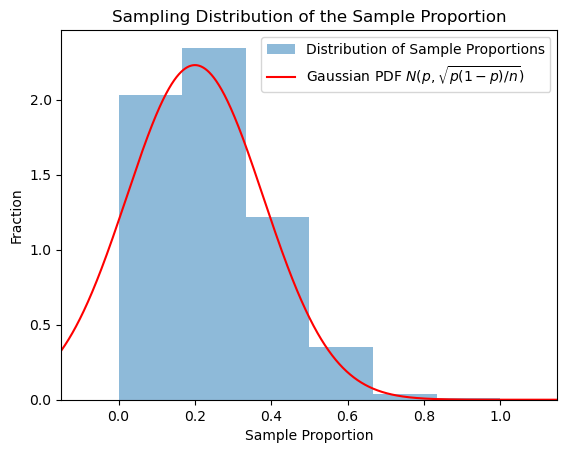

skewness of sample proportions=0.7548756632939031


In [47]:
np.random.seed(115)
sample_proportions = plot_pmf_binomial_sample_proportion(n, p, m)
gamma = sample_skewness(sample_proportions)
print(f"skewness of sample proportions={gamma}")

The binomial distribution with p=0.5 exhibits very little skew (i.e.,
almost symmetrical).  That appears close enough to zero that I can't
likely reject the null hypothesis of it being zero.  Let's find out.
I see skewness of \\(\approx -0.0416\\).  

The following is outside the scope of the original problem, but let's do it anyway...Let's perform a null hypothesis test.

\\(H_0:\\) the skewness is 0.

\\(H_1:\\) not \\(H_0\\) == skewness is not significantly different from 0.

We created 1000 sample proportions.

Let's use a significance level of \\(\alpha=0.05\\) (i.e., 5%).

Let \\(SES\\) denote the standard error of skewness.

$$SES = \sqrt{\frac{6n(n - 1)}{(n - 2)(n + 1)(n + 3)}}$$

This assumes \\(n\\) is large enough for the sampling distribution
of the sample skewness to be approximated with a Gaussian.

$$Z = \frac{\gamma}{SES}$$

This is a two sided comparison, so

$$\text{p-value } = 2(1-\Phi(|Z|))$$

In our case, n is the number of samples drawn Bin(n,p) which is
given by m=1000.  For SES replace each \\(n\\) with \\(m\\).





In [36]:
from scipy.stats import norm
SES = (6*m*(m-1)/((m - 2)*(m + 1)*(m + 3)))**0.5
Z = gamma / SES
p_value = 2 * (1 - norm.cdf(abs(Z)))
print(f"p-value of the sample skewness being equal to 0 is {p_value}")

p-value of the sample skewness being equal to 0 is 0.5906935103438604


This p-value reveals that the skewness is way too close to 0 to reject
that null hypothesis that it is zero.  It doesn't mean that it is 0, 
only that we can't reject the hypothesis that it is given the evidence.

**Problem 4.14** Repeat 4.10 for a binomial distribution with \\(n=5\\)
and \\(p=0.5\\).  

In [37]:
confidence_intervals = t_sample_proportion_ci(x, n, 0.5)
p_hats = confidence_intervals[0][:10]
moes = confidence_intervals[1][:10]

print(f"\n1st ten confidence intervals")
for p_hat, moe in zip(p_hats, moes):
    print(f"{p_hat} ± {moe}")

p_hats, moes = confidence_intervals

# print("p_hats-moes < p")
# print(p_hats-moes < p)

contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")



1st ten confidence intervals
0.6 ± 0.16227860049402593
0.2 ± 0.1324999224611086
0.4 ± 0.16227860049402593
0.6 ± 0.16227860049402593
0.4 ± 0.16227860049402593
0.2 ± 0.1324999224611086
0.0 ± 0.0
0.4 ± 0.16227860049402593
0.4 ± 0.16227860049402593
0.4 ± 0.16227860049402593
percent of confidence intervals that contain p: 60.6%


**Problem 4.15** Repeat 4.11 for a binomial distribution with \\(n=40\\)
and \\(p=0.5\\).
 

In [38]:
np.random.seed(101)
n = 40
p = 0.5
m = 1000
x = np.random.binomial(n, p, m)
assert len(x) == m
confidence_intervals = sample_proportion_ci(x, n, 0.5)
assert len(confidence_intervals) == 2
assert len(confidence_intervals[0]) == m
assert len(confidence_intervals[1]) == m, len(confidence_intervals[1])
p_hats = confidence_intervals[0][:10]
moes = confidence_intervals[1][:10]

print(f"\n1st ten confidence intervals")
for p_hat, moe in zip(p_hats, moes):
    print(f"{p_hat} ± {moe}")

p_hats, moes = confidence_intervals

# print("p_hats-moes < p")
# print(p_hats-moes < p)

contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")


1st ten confidence intervals
0.5 ± 0.0533230967264405
0.525 ± 0.05325640114470828
0.35 ± 0.0508669923082992
0.425 ± 0.052719799032205535
0.55 ± 0.05305581135042942
0.575 ± 0.052719799032205535
0.45 ± 0.05305581135042942
0.6 ± 0.052245751393940505
0.55 ± 0.05305581135042942
0.425 ± 0.052719799032205535
percent of confidence intervals that contain p: 58.199999999999996%


The percentage of confidence intervals containing p does seem high,
so I repeated the confidence interval computation with n = 100 and then n=1000.

In [39]:
n=100
x = np.random.binomial(n, p, m)
p_hats, moes = sample_proportion_ci(x, n, 0.5)
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")

n=1000
x = np.random.binomial(n, p, m)
p_hats, moes = sample_proportion_ci(x, n, 0.5)
contains = np.sum(((p_hats - moes) < p) & (p < (p_hats + moes)))
percent_contains = contains / m * 100
print(f"percent of confidence intervals that contain p: {percent_contains}%")

percent of confidence intervals that contain p: 55.1%
percent of confidence intervals that contain p: 49.3%


With larger \\(n\\), the percentage of 50% confidence intervals containing \\(p\\) gets close to the expected 50%.